<a href="https://colab.research.google.com/github/MemonML/datascience_bootcamp/blob/main/K_mean_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K mean Clustering (unsupervised learning)

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
imag_path = "/content/drive/MyDrive/Data_Science_Boot_Camp/week5/day_19/Kmeans/image.jpg"
image = Image.open(imag_path).convert("L") # Convert to grayscale

In [ ]:
# Convert PIL image to nmpy array
image_np = np.array(image)
# Reshape the image to a 1D array for K-means clustering
image_1d = image_np.reshape(-1, 1)

In [ ]:
image_np.shape, image_1d.shape

((617, 617), (380689, 1))

In [ ]:
#K-means clustering
n=5
kmeans = KMeans(n_clusters=n)
cluster_assignments = kmeans.fit_predict(image_1d)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster_assignments.shape

(380689,)

In [ ]:
# Reshape the cluster assignments back to the image shape
clustered_image = cluster_assignments.reshape(image_np.shape)

In [ ]:
clustered_image.shape

(617, 617)

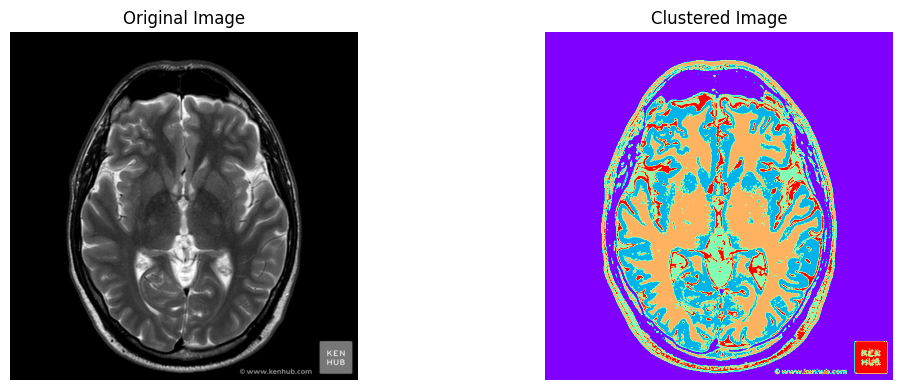

In [ ]:
#plotting
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.imshow(image_np, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(clustered_image, cmap='rainbow')
plt.title('Clustered Image')
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
masks = []
for cluster_id in range(n):
  cluster_mask = (cluster_assignments == cluster_id).reshape(image_np.shape)
  masks.append(cluster_mask)

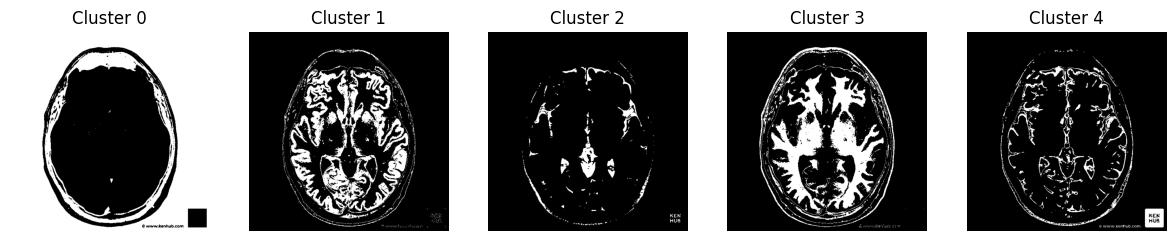

In [ ]:
#plotting
plt.figure(figsize=(18, 12))
for i in range(n):
  plt.subplot(1, n + 1, i + 2)
  plt.imshow(masks[i], cmap='gray')
  plt.title(f'Cluster {i}')
  plt.axis('off')


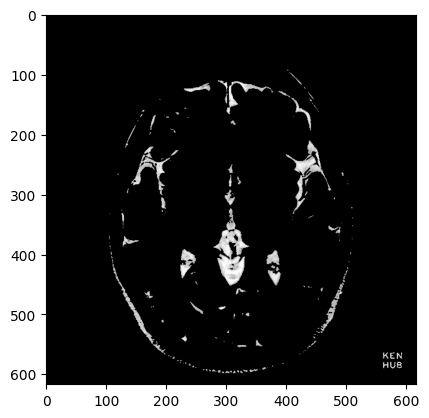

In [ ]:
plt.imshow(image_np*masks[2],cmap='gray')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

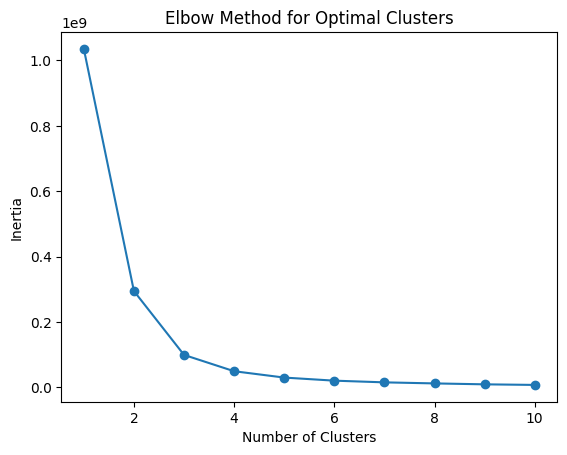

In [ ]:

# Determine the optimal number of clusters using the elbow method
def find_optimal_clusters(data, max_clusters=10):
  inertias = []
  for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
  return inertias

max_clusters = 10
inertias = find_optimal_clusters(image_1d, max_clusters)
# Plot the elbow curve to find the optimal number of clusters
plt.plot(range(1, max_clusters + 1), inertias, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()